# Proyecto Final - Text Mining

- Autor: Fernando José Sagastume Cerna
- Carnet: 17004989
- Sección: U

El objetivo General de este proyecto es tomar la narración de un partido de soccer, extraer el script y hacer una estimación de las estadisticas del partido.

## Colab
Para este proyecto se hicieron algunas pruebas en un colab, se deja el link para cualquier referencia: https://colab.research.google.com/drive/1NCZxtU33aa4TDhQk3VcPf3tEEfhoncnM?usp=sharing

## Link del vídeo

[Click aquí para ver el vídeo](https://youtu.be/9IzrX_KA6JE)

## Metodología o estrategia

1. **Limpieza de Datos:**
- Se eliminan los timestamps del contenido usando expresiones regulares.
2. **Preprocesamiento del Texto:**
- Sustitución de sinónimos.
- Tokenización y eliminación de stopwords y caracteres no alfabéticos.
- Gestión de palabras compuestas.
- Eliminación de duplicados consecutivos y palabras innecesarias.
- Se definen funciones para eliminar ocurrencias repetidas de ciertas palabras en el mismo comentario.
3. **Visualización de WordCloud:**
- Se crea unWordCloud usando los tokens procesados para visualizar las palabras más comunes en el corpus.
4. **Extracción de Estadísticas:**
- Se utilizan expresiones regulares para buscar patrones específicos y contar su ocurrencia.
5. **Comparación con Datos Reales:**
- Se crea un DataFrame con los datos reales y los datos estimados.
- Por medio de un gráfico de barras se visualizan y comparan ambos conjuntos de datos.

In [67]:
# Se importan las librerias a utilizar en el proyecto
import spacy
from spacy.lang.es.stop_words import STOP_WORDS
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

## Limpieza de datos

In [68]:
# Se abre el archivo de texto para lectura
with open('data/barcelona_rm_comentarios.txt', 'r') as f:
    contenido = f.read()

# Se utiliza una expresión regular para reemplazar los timestamps
contenido_sin_timestamps = re.sub(r"^\d+'?\n", "", contenido, flags=re.M)

# Se abre el archivo de texto para escritura y guarda el contenido sin timestamps
with open('data/barcelona_rm.txt', 'w') as f:
    f.write(contenido_sin_timestamps)

In [69]:
#spacy.cli.download("es_core_news_sm")

## Preprocesamiento del Texto

In [70]:
# Se carga el modelo de spacy para español
nlp = spacy.load('es_core_news_sm')

In [71]:
# Se quita de las stop words la palabra fuera porque va servir (a veces lo toma como stopword)
# STOP_WORDS.remove("fuera")

In [72]:
# Función de preprocesamiento del texto
def preprocesar_corpus(texto):

    # Se remplazan sinonimos con la palabra a encontrar
    texto = texto.lower().replace('ocasión', 'remate')
    texto = texto.lower().replace('disparo al poste', 'remate')

    doc = nlp(texto)
    # Se tokeniza, convierte a minúsculas, se remueven stopwords y no alfabéticos
    tokens = [token.text for token in doc if not token.is_stop and token.is_alpha]

    # Procesamos las palabras compuestas durante la tokenización
    processed_tokens = []
    skip_next = False
    for i, token in enumerate(tokens):
        if skip_next:
            skip_next = False
            continue
        if token == "tarjeta" and i + 1 < len(tokens) and (tokens[i+1] == "amarilla" or tokens[i+1] == "roja"):
            processed_tokens.append(f"tarjeta_{tokens[i+1]}")
            skip_next = True
        elif token == "fuera" and i + 1 < len(tokens) and (tokens[i+1] == "juego"):
            processed_tokens.append("fuera_juego")
            skip_next = True        
        else:
            processed_tokens.append(token)

    return processed_tokens

In [73]:
# Función para eliminar de una línea una palabra repetida
def eliminar_segunda_ocurrencia(lineas, palabra):
    lineas_modificadas = []

    for linea in lineas:
        ocurrencias = [match.start() for match in re.finditer(rf'{palabra}', linea, flags=re.IGNORECASE)]

        if len(ocurrencias) > 1:
            # Elimina la segunda ocurrencia
            linea = linea[:ocurrencias[1]] + linea[ocurrencias[1] + len(palabra):]
        
        lineas_modificadas.append(linea)

    return lineas_modificadas

In [74]:
# Se carga el archivo de texto
with open('data/barcelona_rm.txt', 'r') as file:
    lineas = file.readlines()
# Se eliminan algunas palabras clave repetidas en una misma linea
lineas = eliminar_segunda_ocurrencia(lineas, "corner")
lineas = eliminar_segunda_ocurrencia(lineas, "fuera de juego")
# Se ordenan las lineas del archivo (puesto que están en orden inverso)
lineas = [linea.strip() for linea in reversed(lineas)]

# Se invierte el orden de las líneas y se unen
corpus = ' '.join(lineas)

# Se crea un corpus con el procesamiento aplicado al texto
corpus = preprocesar_corpus(corpus)
print(corpus)

['falta', 'david', 'villa', 'barcelona', 'cristiano', 'ronaldo', 'real', 'madrid', 'sufrido', 'falta', 'campo', 'mano', 'pedro', 'rodríguez', 'barcelona', 'juego', 'parado', 'víctor', 'valdés', 'barcelona', 'lesión', 'vuelve', 'normalidad', 'partido', 'corner', 'barcelona', 'ricardo', 'carvalho', 'remate', 'fallada', 'dani', 'alves', 'barcelona', 'disparo', 'derecha', 'centro', 'area', 'pase', 'xavi', 'centro', 'área', 'lionel', 'messi', 'barcelona', 'remate', 'izquierdo', 'disparo', 'izquierda', 'escorado', 'izquierda', 'pase', 'carles', 'puyol', 'saque', 'esquina', 'remate', 'fallada', 'pedro', 'rodríguez', 'barcelona', 'disparo', 'derecha', 'fuera', 'área', 'corner', 'barcelona', 'sami', 'khedira', 'pelota', 'sale', 'izquierda', 'remate', 'fallado', 'dani', 'alves', 'barcelona', 'disparo', 'derecha', 'fuera', 'área', 'pase', 'eric', 'abidal', 'gooooool', 'barcelona', 'real', 'madrid', 'xavi', 'barcelona', 'disparo', 'derecha', 'cerca', 'problemas', 'pase', 'andrés', 'iniesta', 'pase

## Visualización de WordCloud

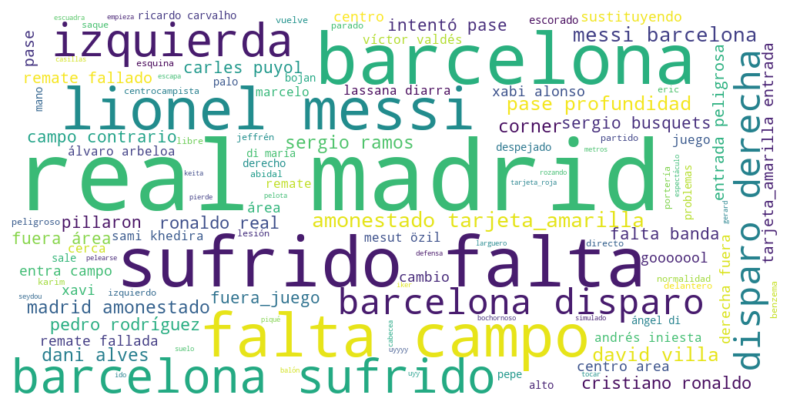

In [76]:
# Se crea un WordCloud con los tokens
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(' '.join(corpus))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Extracción de Estadísticas

In [77]:
corpus = ' '.join(corpus)

# Se buscan eventos con expresiones regulares
patron_gol = re.compile(r'go{2,}l')
goles = patron_gol.findall(corpus)
remates = len(re.findall(r"remate", corpus))
saques_esquina = len(re.findall(r"corner", corpus))
tarjetas_amarillas = len(re.findall(r"tarjeta_amarilla", corpus))
tarjetas_rojas = len(re.findall(r"tarjeta_roja", corpus))
faltas = len(re.findall(r"falta", corpus))
pases_clave = len(re.findall(r"pase", corpus))
fueras_juego = len(re.findall(r"fuera_juego", corpus))

# Se muestran las estadísticas
print(f"Goles: {len(goles)}")
print(f"Remates: {remates}")
print(f"Tiros de esquina: {saques_esquina}")
print(f"Tarjetas amarillas: {tarjetas_amarillas}")
print(f"Tarjetas rojas: {tarjetas_rojas}")
print(f"Faltas: {faltas}")
print(f"Pases clave: {pases_clave}")
print(f"Fueras de juego: {fueras_juego}")

Goles: 5
Remates: 15
Tiros de esquina: 9
Tarjetas amarillas: 13
Tarjetas rojas: 1
Faltas: 49
Pases clave: 24
Fueras de juego: 7


## Comparación con Datos Reales

In [78]:
datos = {
    'Goles': [5],
    'Goles estimados': [len(goles)],
    'Remates': [20],
    'Remates estimados': [remates],
    'Saques de esquina': [9],
    'S. de esquina estimados': [saques_esquina],
    'Tarjetas amarillas': [13],
    'Tarjetas amarillas estimadas': [tarjetas_amarillas],
    'Tarjetas rojas': [1],
    'Tarjetas rojas estimadas': [tarjetas_rojas],
    'Faltas': [28],
    'Faltas estimadas': [faltas],
    'Pases clave': [24],
    'Pases clave estimados': [pases_clave],
    'Fueras de juego': [7],
    'Fueras de juego estimados': [fueras_juego]
}
df_datos = pd.DataFrame(datos)

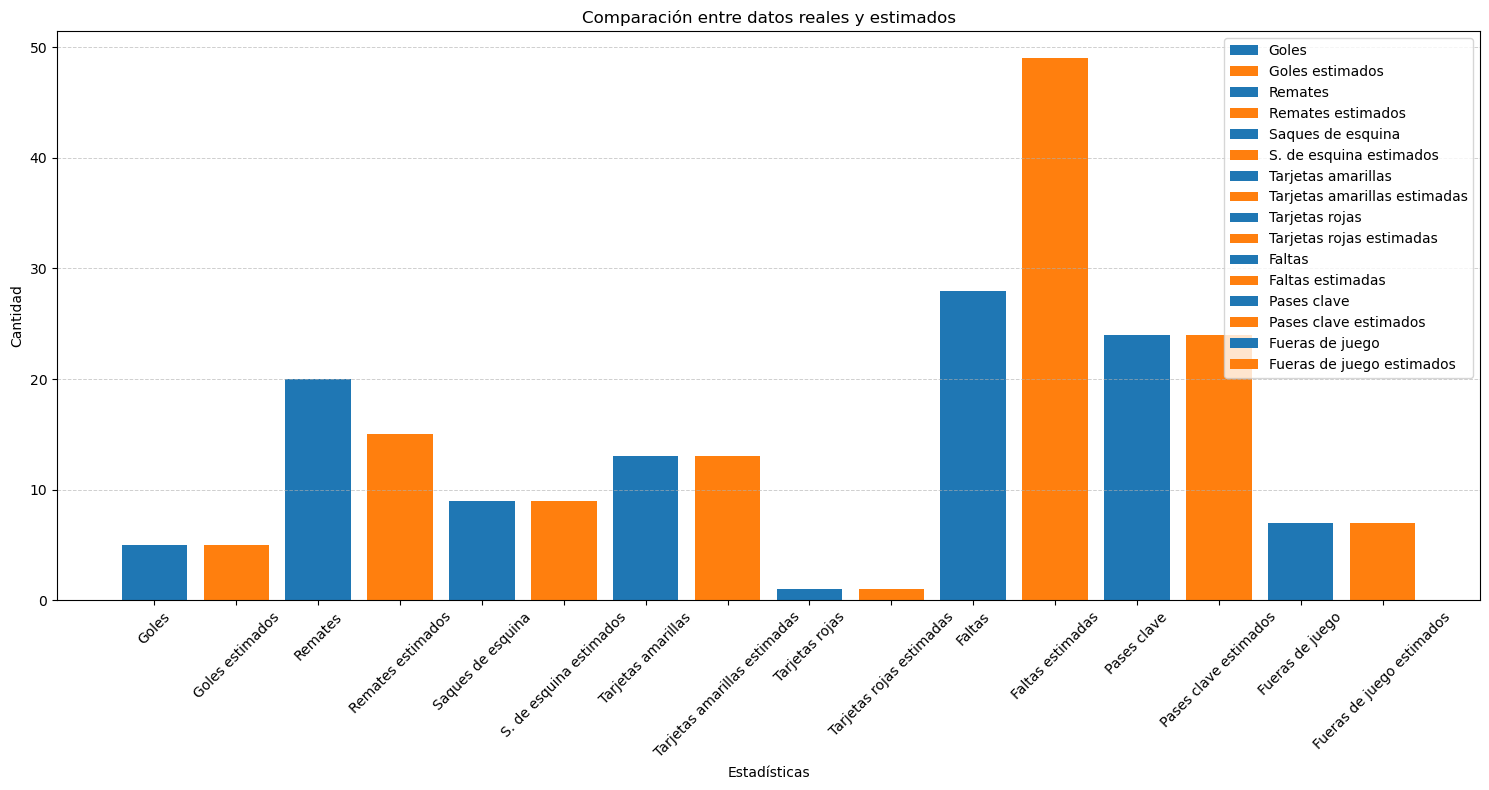

In [79]:
fig, ax = plt.subplots(figsize=(15, 8))

# Lista de colores
colors = ['#1f77b4', '#ff7f0e'] * (len(df_datos.columns) // 2)

# Se grafica cada columna con su respectivo color
for column, color in zip(df_datos.columns, colors):
    ax.bar(column, df_datos[column][0], color=color, label=column)

plt.title('Comparación entre datos reales y estimados')
plt.ylabel('Cantidad')
plt.xlabel('Estadísticas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
plt.legend(loc="upper right")
plt.show()